In [ ]:
# 2.025, decsicion tree, only petals and only sepals, check for report X-Y validation
# 3.00 unsupervised clustering, products you might be interested in, tips wines model
# other samples and try decision tree

# Decision Tree (Dataset - Puma_Indian)

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filepath = "/content/drive/MyDrive/Six_Schools.xlsx"
df = pd.ExcelFile(filepath)

In [ ]:
df.sheet_names

['NCB22',
 'DSC21',
 'PES21',
 'PES22_A',
 'PES22_B',
 'NID20',
 'NID21',
 'KSP21',
 'KSP22',
 'Puma_Indian',
 'all_Schools',
 'RVU22']

In [ ]:
df_puma = df.parse('Puma_Indian')
df_puma.head()

,Height_cm,Weight_Kg,Age,male,Sex,Unnamed: 5,Unnamed: 6,Unnamed: 7,ht_bin
0,53.9750,4.252425,0.0,0,F,NaN,53.975,NaN,50.0
1,55.8800,4.847765,0.0,0,F,NaN,179.070,NaN,60.0
2,56.5150,5.159609,0.0,0,F,NaN,NaN,NaN,70.0
3,59.6138,5.896696,1.0,0,F,NaN,NaN,NaN,80.0
4,60.4520,5.669900,1.0,1,M,NaN,NaN,NaN,90.0


In [ ]:
columns_to_drop = ['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'ht_bin']

In [ ]:
df_puma = df_puma.drop(columns = columns_to_drop)

In [ ]:
df_puma.tail()

,Height_cm,Weight_Kg,Age,male,Sex
539,171.1198,56.557252,37.0,1,M
540,171.4500,56.557252,52.0,1,M
541,172.7200,61.801910,22.0,1,M
542,172.9994,51.255896,38.0,1,M
543,179.0700,55.706767,23.0,1,M


In [ ]:
df_puma = df_puma[df_puma['Age'] >= 0]

In [ ]:
X = df_puma[['Height_cm', 'Weight_Kg', 'Age']]
y = df_puma['male']

In [ ]:
dt = DecisionTreeClassifier(max_depth = 3, random_state = 0)
model = dt.fit(X, y)

In [ ]:
pred = model.predict(X)

In [ ]:
pred[:5]

array([0, 0, 0, 0, 0])

In [ ]:
df = df_puma.copy()
df['y_hat'] = pred
df['error'] = abs(df.y_hat - df.male)

In [ ]:
df.head()

,Height_cm,Weight_Kg,Age,male,Sex,y_hat,error
0,53.9750,4.252425,0.0,0,F,0,0
1,55.8800,4.847765,0.0,0,F,0,0
2,56.5150,5.159609,0.0,0,F,0,0
3,59.6138,5.896696,1.0,0,F,0,0
4,60.4520,5.669900,1.0,1,M,0,1


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y, pred)
print(report)

              precision    recall  f1-score   support

           0       0.70      0.95      0.80       287
           1       0.90      0.54      0.68       257

    accuracy                           0.76       544
   macro avg       0.80      0.75      0.74       544
weighted avg       0.80      0.76      0.75       544



In [ ]:
!pip install dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.3 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


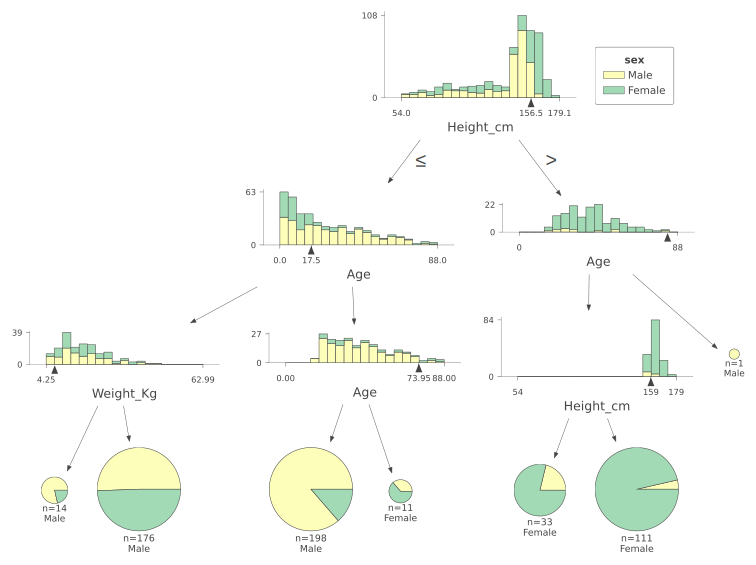

In [ ]:
import dtreeviz
viz = dtreeviz.model(dt, X, y,
               feature_names=['Height_cm', 'Weight_Kg', 'Age'],
               target_name='sex',
               class_names=['Male', 'Female'])
viz.view(scale = 1.4)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

clf = DecisionTreeClassifier(random_state = 42)
model = clf.fit(X_train,Y_train)
report = classification_report(Y_validation, model.predict(X_validation))
print(report)

import re
report_ = re.sub('\n\n           0','\n\nmale      ',report)
report_ = re.sub('\n           1','\nfemale  ',report_)
print(report_)

              precision    recall  f1-score   support

           0       0.76      0.67      0.72        58
           1       0.67      0.76      0.72        51

    accuracy                           0.72       109
   macro avg       0.72      0.72      0.72       109
weighted avg       0.72      0.72      0.72       109

              precision    recall  f1-score   support

male             0.76      0.67      0.72        58
female         0.67      0.76      0.72        51

    accuracy                           0.72       109
   macro avg       0.72      0.72      0.72       109
weighted avg       0.72      0.72      0.72       109



In [ ]:
filepath2 = "/content/drive/MyDrive/practise/imdb_data.csv"

In [ ]:
df = pd.read_csv(filepath2)

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
